In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy wordcloud 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:14 

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 58 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import re
from bs4 import BeautifulSoup
import warnings
import numpy as np
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_excel('/배달의민족_리뷰.xlsx')
df.head(3) 

,Unnamed: 0,별점,키워드,리뷰
0,NaN,1,첫 화면,첫화면 누구 생각인가요? 앱 사용해보고 만드신거 맞죠? 수수료 받아가서 한다는게 더...
1,NaN,1,첫 화면,첫화면 바뀐거 너무 별로네요 자주 사용하는 기능이 첫화면에 있으면 좋겠어요.. 클릭...
2,NaN,1,중복 가게 제거 및 노출,같은 가게가 깃발을 여러개 꼽아서 그런진 모르겠지만 중복가게가 너무 많이 보여서 덕...


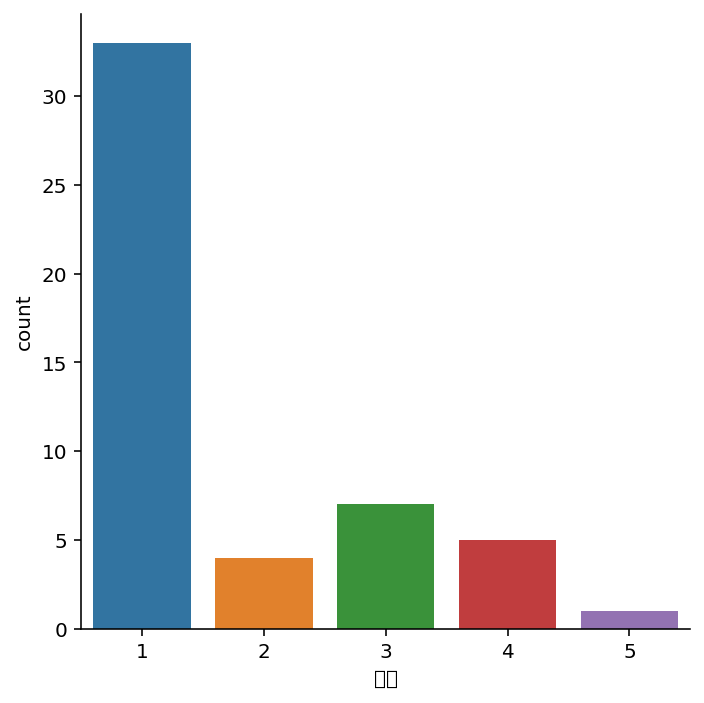

In [ ]:
sns.factorplot('별점',kind='count',data=df)

In [ ]:
df['별점'].value_counts()

1    33
3     7
4     5
2     4
5     1
Name: 별점, dtype: int64

In [ ]:
high_rate_review = df[df['별점'] >= 3]['리뷰']
low_rate_review = df[df['별점'] <= 2]['리뷰']

In [ ]:
len(high_rate_review)

13

In [ ]:
len(low_rate_review)

37

In [ ]:
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))

In [ ]:
high_rate_review[:10]

4     주문현황에서 실시간 지도 움직이는거 생성해주세요 배민원만 실시간 지도 움직이는거만 ...
7     배달 잘시켜먹고있습니다 근대 환경생각한다고 수저 계속 클릭하게 만든거 너무 불편해요...
9     면하고 좋은데 가게전달사항에 수저 안주셔도되요가 기본으로 되어있어서 벌써 몇번째 편...
11    영양소 표기도 의무화했으면 좋겠습니다 제가 오늘 점심에 우동과 달걀초밥을 먹고 괴로...
15    다좋은데요 주문해먹고 음식이 입맛에 안맞았을때 소비자만볼수있게 체크해놀수있는 기능이...
19    사용하는데 문제는 없는데요 불편한 점 딱하나있습니다 왜 만나서 카드결제는 어플에 카...
22    배달팁 낮은 순으로 정렬을 했을 때 대부분의 가게가 배달팁 0원부터 시작합니다 하지...
29    배달비 정렬기능 좀 개선해주시길 바랍니다 실상 몇만원 이상 주문해야 0원인 곳이 배...
31    진짜 잘 애용하고 있습니다 헌데 추가적으로 있었으면 하는 기능이 있습니다 사용자소비...
32    다좋은데 주택사는 사람은 집위치 가좀 모르는것같아보입니다 위치좀 알기쉽게 설명해도 ...
Name: 리뷰, dtype: object

In [ ]:
low_rate_review[:10]

0     첫화면 누구 생각인가요 앱 사용해보고 만드신거 맞죠 수수료 받아가서 한다는게 더 불...
1     첫화면 바뀐거 너무 별로네요 자주 사용하는 기능이 첫화면에 있으면 좋겠어요 클릭 횟...
2     같은 가게가 깃발을 여러개 꼽아서 그런진 모르겠지만 중복가게가 너무 많이 보여서 덕...
3     평상시 자주 애용하는 앱입니다만 공유주방으로 한 업체가 모든 카테고리를 독점하다시피...
5     이제 주문하면 문자도 안오네요 어떻게 서비스가 더 퇴보할 수가 있나요 물론 상태바에...
6     아니 왜 주문취소가 안되나요 식당에서 주문내역 확인해주자마자 잘못된 지점에서 주문한...
8     진짜 수저 강제는 무슨 생각으로 만들어논건지 알수가 없네 체크를 꼭하게 주문 버튼 ...
10    업데이트전에는 할인이나 이벤트가 맨 위에 있어서 보기 쉽고 이런 이벤트를 진행중이구...
12    1 쇼핑라이브시청자수 조작하는거 보기싫으니 환경설정에 안보이게 기능 추가해주세요 2...
13    갈수록 양심따위 버리는구나배달비 그렇게 처올렸으면 됐지 소액주문비라는 개같은 시스템...
Name: 리뷰, dtype: object

In [ ]:
low_tagger = Twitter()
high_tagger = Twitter()

In [ ]:
def get_word_low_rating(sentence):
    nouns = low_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_high_rating(sentence):
    nouns = high_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

In [ ]:
low_countvector = CountVectorizer(tokenizer=get_word_low_rating, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

In [ ]:
low_words[:5]

['가게', '가격', '가끔', '가능', '가독성']

In [ ]:
count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
low_rating_word_count[:15]

[('배달', 55),
 ('가게', 37),
 ('리뷰', 17),
 ('배민', 12),
 ('주문', 12),
 ('기능', 10),
 ('시간', 10),
 ('정렬', 10),
 ('사용', 9),
 ('생각', 9),
 ('어플', 9),
 ('업데이트', 9),
 ('음식', 8),
 ('설정', 7),
 ('소비자', 7)]

In [ ]:
high_countvector = CountVectorizer(tokenizer=get_word_high_rating, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
high_rating_word_count[:15]

[('배달', 33),
 ('가게', 15),
 ('메뉴', 10),
 ('기능', 9),
 ('리뷰', 9),
 ('주문', 9),
 ('소진', 7),
 ('재료', 7),
 ('기사', 5),
 ('영수증', 5),
 ('때문', 4),
 ('소비자', 4),
 ('실시간', 4),
 ('완료', 4),
 ('음식', 4)]

In [ ]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

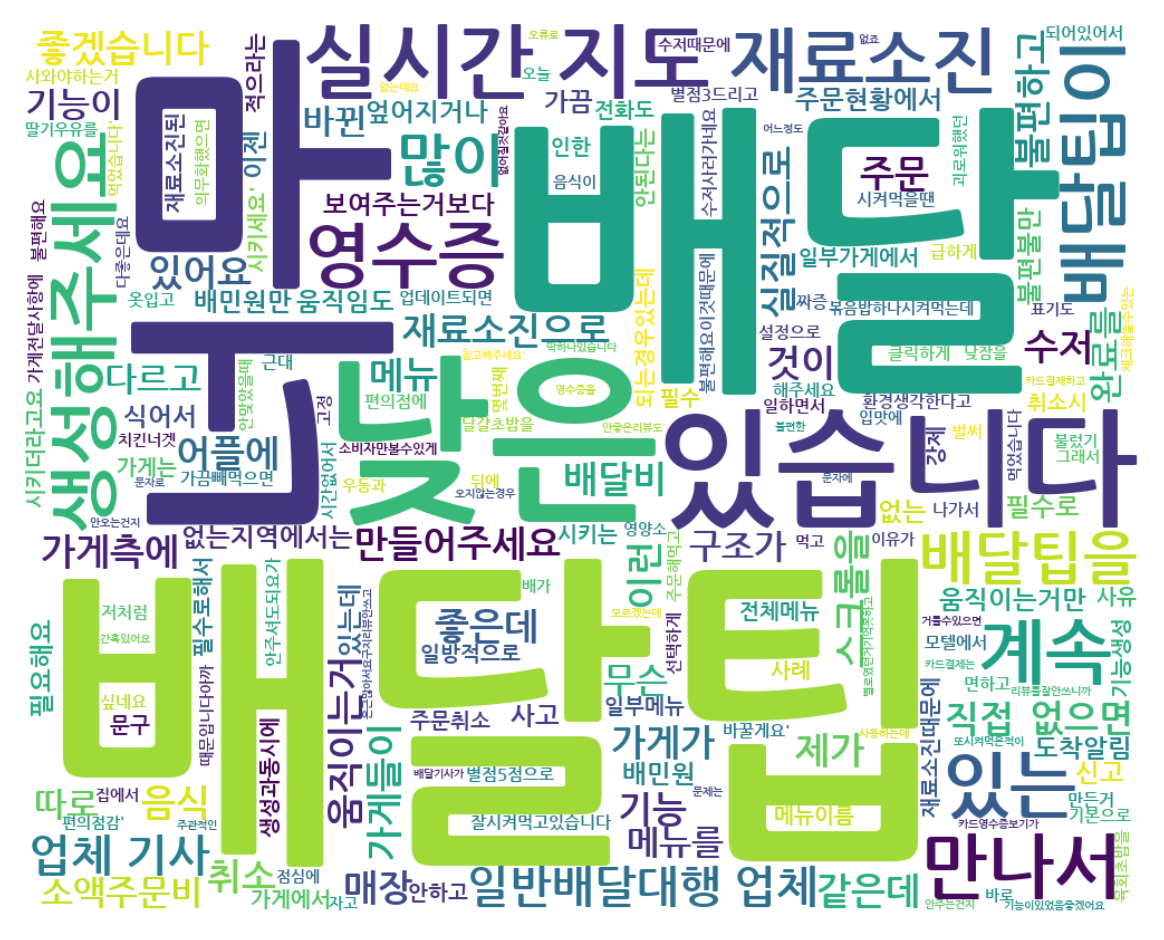

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

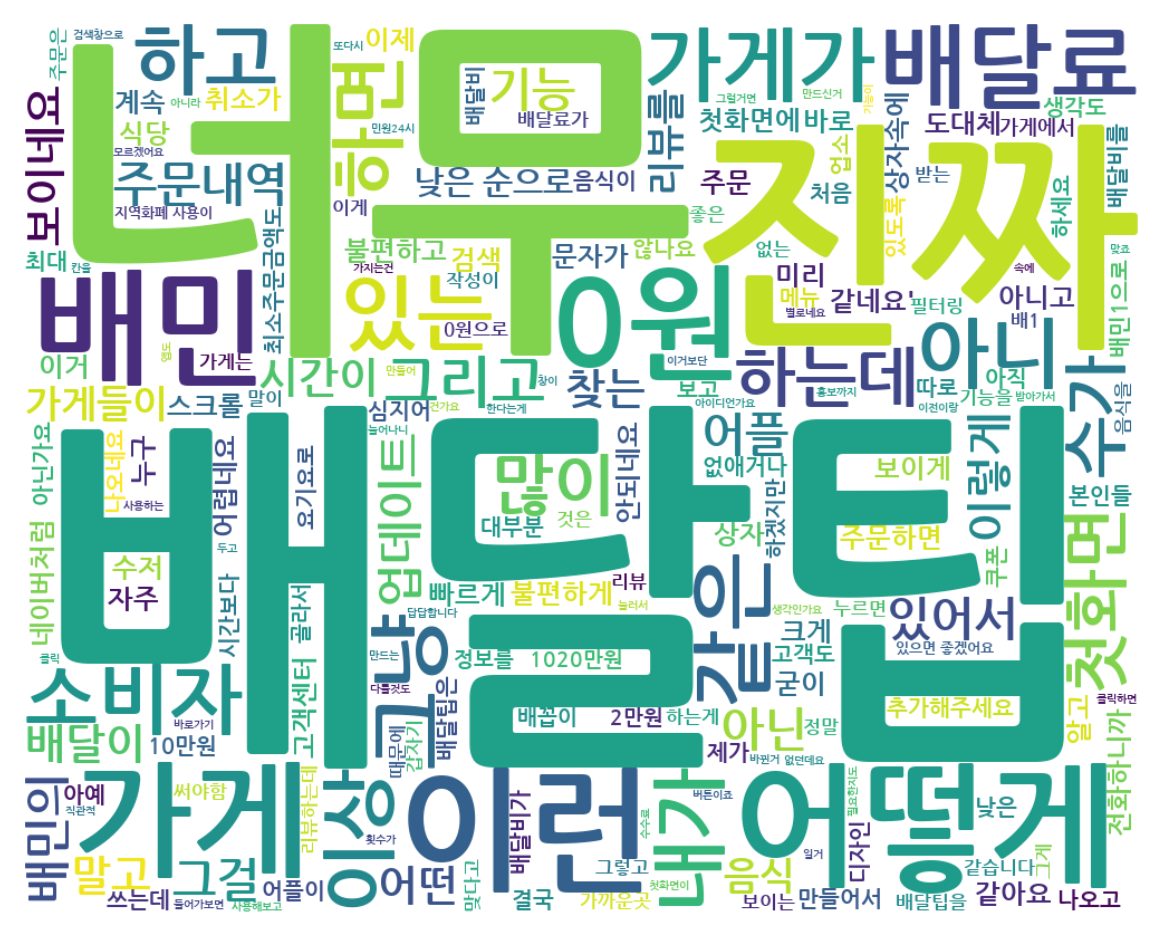

In [ ]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()